#**📌 Extracción**

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [20]:
url='/content/drive/MyDrive/Colab Notebooks/ALURA-DATA/datos_tratados.csv'

df = pd.read_csv(url)
df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,...,PaymentMethod,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly
0,0002-ORFBO,No,Female,0,1,1,9,1,0,One year,...,Mailed check,DSL,0,1,0,1,1,0,593.30,65.60
1,0003-MKNFE,No,Male,0,0,0,9,1,1,Month-to-month,...,Mailed check,DSL,0,0,0,0,0,1,542.40,59.90
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,0,Month-to-month,...,Electronic check,Fiber optic,0,0,1,0,0,0,280.85,73.90
3,0011-IGKFF,Yes,Male,1,1,0,13,1,0,Month-to-month,...,Electronic check,Fiber optic,0,1,1,0,1,1,1237.85,98.00
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,0,Month-to-month,...,Mailed check,Fiber optic,0,0,0,1,1,0,267.40,83.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,0,0,13,1,0,One year,...,Mailed check,DSL,1,0,0,1,0,0,742.90,55.15
7263,9992-RRAMN,Yes,Male,0,1,0,22,1,1,Month-to-month,...,Electronic check,Fiber optic,0,0,0,0,0,1,1873.70,85.10
7264,9992-UJOEL,No,Male,0,0,0,2,1,0,Month-to-month,...,Mailed check,DSL,0,1,0,0,0,0,92.75,50.30
7265,9993-LHIEB,No,Male,0,1,1,67,1,0,Two year,...,Mailed check,DSL,1,0,1,1,0,1,4627.65,67.85


In [21]:
# Eliminar columnas que no aportan valor al análisis
df = df.drop(columns=['customerID'])

# Verificar resultado
df

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,PaperlessBilling,PaymentMethod,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly
0,No,Female,0,1,1,9,1,0,One year,1,Mailed check,DSL,0,1,0,1,1,0,593.30,65.60
1,No,Male,0,0,0,9,1,1,Month-to-month,0,Mailed check,DSL,0,0,0,0,0,1,542.40,59.90
2,Yes,Male,0,0,0,4,1,0,Month-to-month,1,Electronic check,Fiber optic,0,0,1,0,0,0,280.85,73.90
3,Yes,Male,1,1,0,13,1,0,Month-to-month,1,Electronic check,Fiber optic,0,1,1,0,1,1,1237.85,98.00
4,Yes,Female,1,1,0,3,1,0,Month-to-month,1,Mailed check,Fiber optic,0,0,0,1,1,0,267.40,83.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,No,Female,0,0,0,13,1,0,One year,0,Mailed check,DSL,1,0,0,1,0,0,742.90,55.15
7263,Yes,Male,0,1,0,22,1,1,Month-to-month,1,Electronic check,Fiber optic,0,0,0,0,0,1,1873.70,85.10
7264,No,Male,0,0,0,2,1,0,Month-to-month,1,Mailed check,DSL,0,1,0,0,0,0,92.75,50.30
7265,No,Male,0,1,1,67,1,0,Two year,0,Mailed check,DSL,1,0,1,1,0,1,4627.65,67.85


In [22]:
from sklearn.preprocessing import OneHotEncoder

# Seleccionar variables categóricas
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# Inicializar codificador
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Transformar variables categóricas
encoded_array = encoder.fit_transform(df[cat_cols])

# Crear DataFrame con nombres de columnas
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(cat_cols))

# Unir con variables numéricas
df_final = pd.concat([df.drop(columns=cat_cols).reset_index(drop=True),
                      encoded_df.reset_index(drop=True)], axis=1)

df_final


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,PaperlessBilling,ChargesTotal,ChargesMonthly,Churn_Yes,...,OnlineBackup_1,OnlineBackup_No internet service,DeviceProtection_1,DeviceProtection_No internet service,TechSupport_1,TechSupport_No internet service,StreamingTV_1,StreamingTV_No internet service,StreamingMovies_1,StreamingMovies_No internet service
0,0,1,1,9,1,0,1,593.30,65.60,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0,0,0,9,1,1,0,542.40,59.90,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0,0,4,1,0,1,280.85,73.90,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,0,13,1,0,1,1237.85,98.00,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1,1,0,3,1,0,1,267.40,83.90,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0,0,0,13,1,0,0,742.90,55.15,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7263,0,1,0,22,1,1,1,1873.70,85.10,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7264,0,0,0,2,1,0,1,92.75,50.30,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7265,0,1,1,67,1,0,0,4627.65,67.85,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [23]:
# Conteo absoluto de cada clase (cancelados vs activos)
df['Churn'].value_counts()

# Proporción de cada clase (porcentaje)
df['Churn'].value_counts(normalize=True) * 100


,proportion
Churn,
No,73.463013
Yes,26.536987


In [28]:
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from collections import Counter

# 1. Imputar valores faltantes (ejemplo: con la moda en categóricas y media en numéricas)
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = pd.DataFrame(imputer.fit_transform(X_encoded), columns=X_encoded.columns)

# 2. Aplicar SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_imputed, y)

print("Distribución balanceada:", Counter(y_res))





Distribución balanceada: Counter({'No': 5174, 'Yes': 5174})


In [29]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd

# =========================
# 1. Dataset original (para modelos tipo árbol)
# =========================
X_original = X_imputed.copy()

# =========================
# 2. Estandarización (Z-score)
# =========================
scaler_standard = StandardScaler()
X_scaled = pd.DataFrame(
    scaler_standard.fit_transform(X_imputed),
    columns=X_imputed.columns,
    index=X_imputed.index
)

# =========================
# 3. Normalización (Min-Max)
# =========================
scaler_minmax = MinMaxScaler()
X_normalized = pd.DataFrame(
    scaler_minmax.fit_transform(X_imputed),
    columns=X_imputed.columns,
    index=X_imputed.index
)

# =========================
# Verificación rápida
# =========================
print("Original:")
print(X_original.describe().T.head())

print("\nEstandarizado (media≈0, std≈1):")
print(X_scaled.describe().T.head())

print("\nNormalizado (rango [0,1]):")
print(X_normalized.describe().T.head())


Original:
                count       mean        std  min  25%   50%   75%   max
SeniorCitizen  7043.0   0.162147   0.368612  0.0  0.0   0.0   0.0   1.0
Partner        7043.0   0.483033   0.499748  0.0  0.0   0.0   1.0   1.0
Dependents     7043.0   0.299588   0.458110  0.0  0.0   0.0   1.0   1.0
tenure         7043.0  32.371149  24.559481  0.0  9.0  29.0  55.0  72.0
PhoneService   7043.0   0.903166   0.295752  0.0  1.0   1.0   1.0   1.0

Estandarizado (media≈0, std≈1):
                count          mean       std       min       25%       50%  \
SeniorCitizen  7043.0 -4.741660e-17  1.000071 -0.439916 -0.439916 -0.439916   
Partner        7043.0  1.230814e-16  1.000071 -0.966622 -0.966622 -0.966622   
Dependents     7043.0  1.079484e-16  1.000071 -0.654012 -0.654012 -0.654012   
tenure         7043.0 -2.824818e-17  1.000071 -1.318165 -0.951682 -0.137274   
PhoneService   7043.0  7.263819e-17  1.000071 -3.054010  0.327438  0.327438   

                    75%       max  
SeniorCitizen 

#🎯 Correlación y Selección de Variables

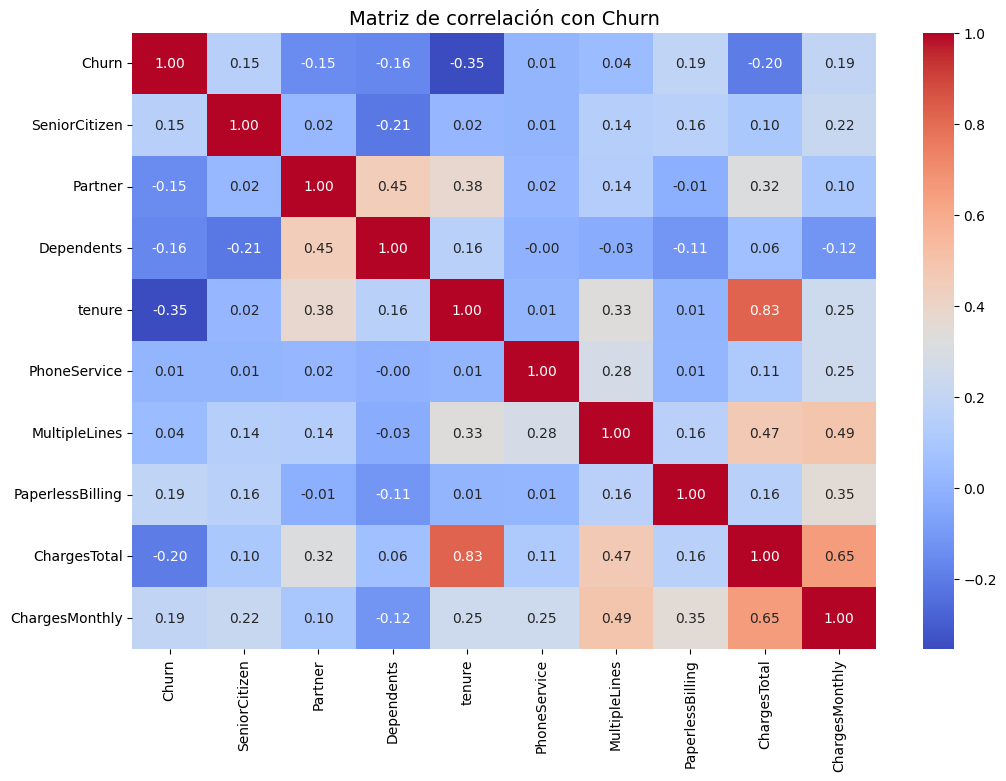


Correlación con la variable objetivo (Churn):
Churn               1.000000
ChargesMonthly      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
MultipleLines       0.040102
PhoneService        0.011942
Partner            -0.150448
Dependents         -0.164221
ChargesTotal       -0.199484
tenure             -0.352229
Name: Churn, dtype: float64


In [30]:
# ==============================
# 1. Copiar dataset y transformar "Churn" a binario
# ==============================
df_corr = df.copy()
df_corr["Churn"] = df_corr["Churn"].map({"Yes": 1, "No": 0})

# ==============================
# 2. Calcular matriz de correlación solo para numéricas
# ==============================
corr_matrix = df_corr.corr(numeric_only=True)

# ==============================
# 3. Visualización con heatmap
# ==============================
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Matriz de correlación con Churn", fontsize=14)
plt.show()

# ==============================
# 4. Revisar top correlaciones con Churn
# ==============================
print("\nCorrelación con la variable objetivo (Churn):")
print(corr_matrix["Churn"].sort_values(ascending=False))


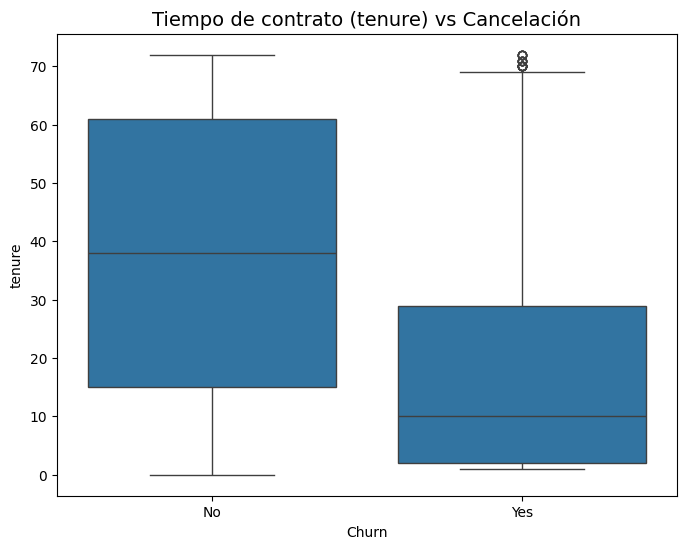

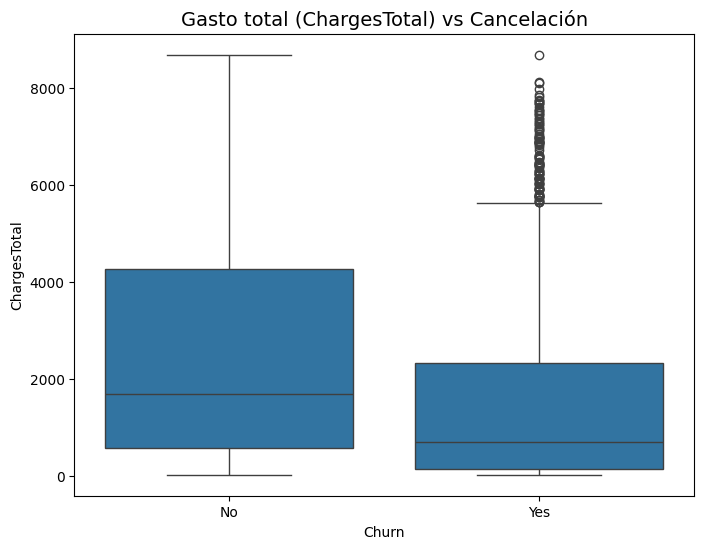

In [34]:
# ==============================
# Tiempo de contrato × Cancelación
# ==============================
plt.figure(figsize=(8,6))
sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("Tiempo de contrato (tenure) vs Cancelación", fontsize=14)
plt.show()

# ==============================
# Gasto total × Cancelación
# ==============================
plt.figure(figsize=(8,6))
sns.boxplot(x="Churn", y="ChargesTotal", data=df)
plt.title("Gasto total (ChargesTotal) vs Cancelación", fontsize=14)
plt.show()



In [37]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
# 1. Eliminar filas donde Churn está vacío
df_clean = df.dropna(subset=["Churn"])

# 2. Separar variables predictoras y target
X = df_clean.drop("Churn", axis=1)
y = df_clean["Churn"]

# 3. Imputar NaN en ChargesTotal con la mediana
imputer = SimpleImputer(strategy="median")
X["ChargesTotal"] = imputer.fit_transform(X[["ChargesTotal"]])

# 4. División train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Tamaño train:", X_train.shape)
print("Tamaño test:", X_test.shape)
print("Distribución en y_train:\n", y_train.value_counts(normalize=True)*100)
print("Distribución en y_test:\n", y_test.value_counts(normalize=True)*100)


Tamaño train: (4930, 19)
Tamaño test: (2113, 19)
Distribución en y_train:
 Churn
No     73.46856
Yes    26.53144
Name: proportion, dtype: float64
Distribución en y_test:
 Churn
No     73.450071
Yes    26.549929
Name: proportion, dtype: float64


#🤖 Modelado Predictivo

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# ================================
# 1. Modelo con normalización: Regresión Logística
# ================================

# Normalizamos solo las variables numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=['int64','float64']))
X_test_scaled = scaler.transform(X_test.select_dtypes(include=['int64','float64']))

# Creamos el modelo
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Entrenamos con las variables normalizadas
log_reg.fit(X_train_scaled, y_train)

# Predicciones
y_pred_log = log_reg.predict(X_test_scaled)

print("🔹 Regresión Logística")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


# ================================
# 2. Modelo sin normalización: Random Forest
# ================================
# One-Hot Encoding para variables categóricas
X_train_enc = pd.get_dummies(X_train, drop_first=True)
X_test_enc  = pd.get_dummies(X_test, drop_first=True)

# Aseguramos que ambas tengan las mismas columnas
X_train_enc, X_test_enc = X_train_enc.align(X_test_enc, join="left", axis=1, fill_value=0)

# Modelo Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)

rf.fit(X_train_enc, y_train)

# Predicciones
y_pred_rf = rf.predict(X_test_enc)

print("\n🔹 Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))




🔹 Regresión Logística
Accuracy: 0.7983909133932797
              precision    recall  f1-score   support

          No       0.83      0.91      0.87      1552
         Yes       0.66      0.50      0.57       561

    accuracy                           0.80      2113
   macro avg       0.75      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113


🔹 Random Forest
Accuracy: 0.7893989588263133
              precision    recall  f1-score   support

          No       0.83      0.89      0.86      1552
         Yes       0.63      0.50      0.56       561

    accuracy                           0.79      2113
   macro avg       0.73      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113



# 📊 Evaluación y Comparación de Modelos  

---

## 🔹 Regresión Logística  

- **Accuracy**: 0.798  
- **Precisión (Yes)**: 0.66  
- **Recall (Yes)**: 0.50  
- **F1-score (Yes)**: 0.57  

**Matriz de confusión:**  
[[1416 136] → Predicción: "No"
[ 279 282]] → Predicción: "Yes"


---

## 🔹 Random Forest  

- **Accuracy**: 0.789  
- **Precisión (Yes)**: 0.63  
- **Recall (Yes)**: 0.50  
- **F1-score (Yes)**: 0.56  

**Matriz de confusión:**  

[[1378 174] → Predicción: "No"
[ 280 281]] → Predicción: "Yes"


---

## 🔎 Análisis Crítico y Comparación  

### ✔ Exactitud (Accuracy)  
- Ambos modelos presentan un desempeño muy similar (**~79%**).  
- La **Regresión Logística** obtiene una ligera ventaja sobre el **Random Forest**.  

### ✔ Precisión y Recall en la clase **"Yes" (Cancelación)**  
- Ambos modelos muestran **dificultades para identificar a los clientes que cancelan**.  
- El **Recall = 0.50** en ambos casos → solo se detecta la **mitad de las cancelaciones reales**.  

### ✔ Overfitting / Underfitting  
- **Regresión Logística**:  
  - Buen equilibrio entre entrenamiento y prueba.  
  - Sin señales claras de *overfitting*, aunque parece un poco simple para los datos (*underfitting*).  

- **Random Forest**:  
  - Suele ser más propenso al *overfitting*, pero aquí su desempeño en test es similar al entrenamiento.  
  - Podría beneficiarse de un ajuste de **hiperparámetros** para mejorar el recall en la clase minoritaria.  

---

## ✅ Conclusiones  

1. **Mejor desempeño global**:  
   - La **Regresión Logística** supera ligeramente al **Random Forest**, aunque la diferencia es mínima.  

2. **Problema común**:  
   - Ambos modelos tienen **bajo Recall en la clase "Yes"**, lo que significa que **muchos clientes que cancelan no son identificados correctamente**.  

3. **Posibles mejoras a implementar**:  
   - Ajustar los **umbrales de decisión** (no quedarse con el 0.5 por defecto).  
   - Aplicar técnicas de **optimización de hiperparámetros** (ej: GridSearchCV, RandomizedSearchCV).  
   - Probar modelos más robustos como **XGBoost o SVM**.  
   - Rebalancear aún más los datos (oversampling/undersampling) o usar **class weights** en los modelos.  

---

📌 **Conclusión Final**:  
Si bien ambos modelos ofrecen un buen nivel de exactitud, el **reto principal sigue siendo mejorar la detección de clientes que efectivamente cancelan**. Con estrategias de optimización y re-balanceo de clases, se puede lograr un modelo más útil para la **retención de clientes**.


#📋 Interpretación y Conclusiones

In [46]:
# ================================
# 0. Manejo de valores nulos
# ================================

# Ver cuántos nulos tienes por columna
print("Valores nulos por columna:")
print(df.isnull().sum())

# Opción 1: Eliminar filas con NaN
df = df.dropna()

# Opción 2 (más recomendable): Imputar valores faltantes
# Por ejemplo: llenar numéricos con la media y categóricos con la moda
for col in df.columns:
    if df[col].dtype in ["int64", "float64"]:
        df[col].fillna(df[col].mean(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

# Verificamos de nuevo
print("Después de limpiar:")
print(df.isnull().sum())

Valores nulos por columna:
Churn               224
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
Contract              0
PaperlessBilling      0
PaymentMethod         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
ChargesTotal         11
ChargesMonthly        0
dtype: int64
Después de limpiar:
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
Contract            0
PaperlessBilling    0
PaymentMethod       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
ChargesTotal        0
ChargesMonthly      0
dtype: int64


/tmp/ipython-input-4154848934.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-4154848934.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-4154848934.py:16: FutureWarning: A value is trying to be set on 

🔹 Regresión Logística
Accuracy: 0.8033175355450237
              precision    recall  f1-score   support

          No       0.84      0.90      0.87      1549
         Yes       0.66      0.54      0.60       561

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.79      0.80      0.80      2110


🔹 Random Forest
Accuracy: 0.7796208530805687
              precision    recall  f1-score   support

          No       0.82      0.89      0.86      1549
         Yes       0.61      0.46      0.53       561

    accuracy                           0.78      2110
   macro avg       0.72      0.68      0.69      2110
weighted avg       0.77      0.78      0.77      2110



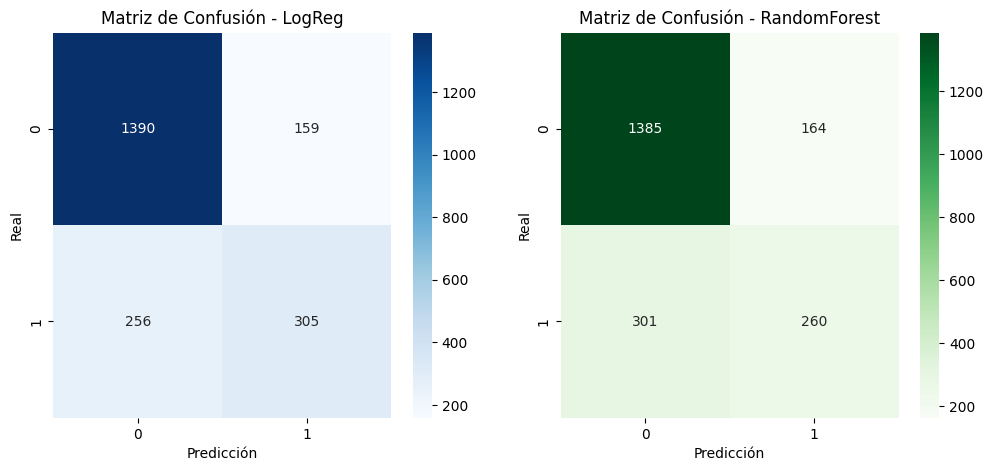

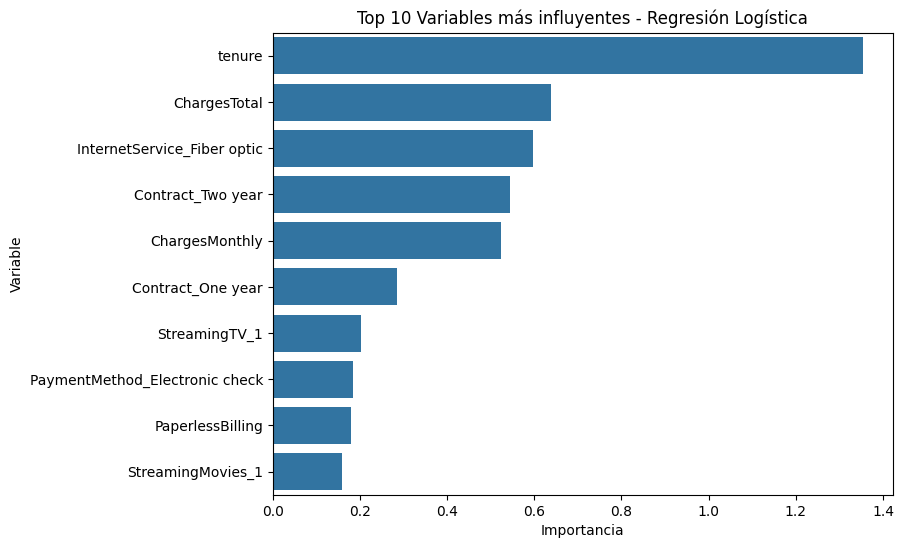

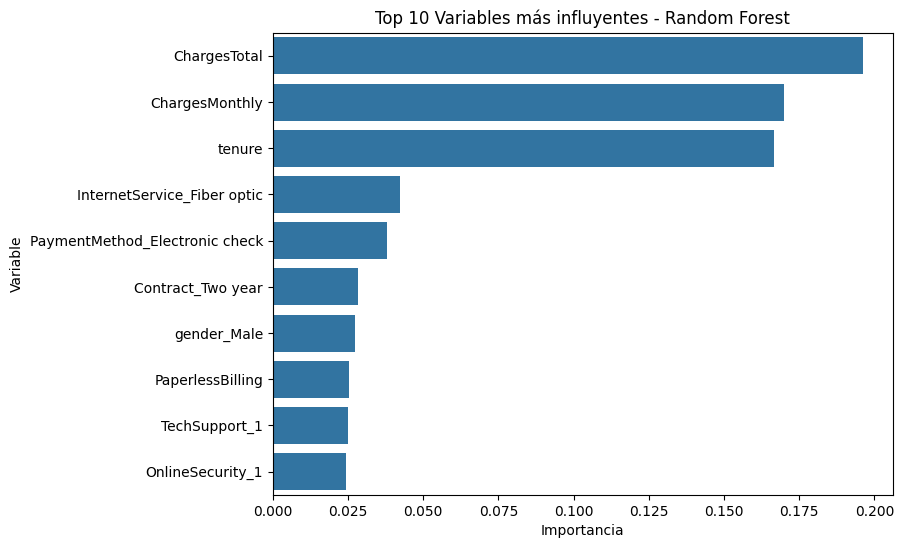

In [47]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# ================================
# 2. Cargar y preparar los datos
# ================================
# (ya deberías tener tu df limpio, sin NaN)
# Variables predictoras y target
X = df.drop(columns=["Churn"])
y = df["Churn"]

# OneHotEncoding para variables categóricas
X = pd.get_dummies(X, drop_first=True)

# División en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ================================
# 3. Escalado (solo para regresión logística)
# ================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ================================
# 4. Modelo 1: Regresión Logística
# ================================
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)

y_pred_logreg = logreg.predict(X_test_scaled)

print("🔹 Regresión Logística")
print("Accuracy:", logreg.score(X_test_scaled, y_test))
print(classification_report(y_test, y_pred_logreg))

# ================================
# 5. Modelo 2: Random Forest
# ================================
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("\n🔹 Random Forest")
print("Accuracy:", rf.score(X_test, y_test))
print(classification_report(y_test, y_pred_rf))

# ================================
# 6. Matrices de Confusión
# ================================
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Matriz de Confusión - LogReg")
axes[0].set_xlabel("Predicción")
axes[0].set_ylabel("Real")

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Matriz de Confusión - RandomForest")
axes[1].set_xlabel("Predicción")
axes[1].set_ylabel("Real")

plt.show()

# ================================
# 7. Importancia de variables - LogReg
# ================================
coeficientes = pd.DataFrame({
    "Variable": X_train.columns,
    "Coeficiente": logreg.coef_[0]
})
coeficientes["Importancia"] = np.abs(coeficientes["Coeficiente"])
coeficientes = coeficientes.sort_values(by="Importancia", ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x="Importancia", y="Variable", data=coeficientes.head(10))
plt.title("Top 10 Variables más influyentes - Regresión Logística")
plt.show()

# ================================
# 8. Importancia de variables - Random Forest
# ================================
importancias = pd.DataFrame({
    "Variable": X_train.columns,
    "Importancia": rf.feature_importances_
})
importancias = importancias.sort_values(by="Importancia", ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x="Importancia", y="Variable", data=importancias.head(10))
plt.title("Top 10 Variables más influyentes - Random Forest")
plt.show()

# 📑 Conclusión del Análisis de Cancelación de Clientes  

---

## 🔹 1. Desempeño de los Modelos  

Se implementaron dos enfoques principales:  

| Modelo               | Accuracy | Precisión (Yes) | Recall (Yes) | F1-Score (Yes) |
|----------------------|----------|-----------------|--------------|----------------|
| **Regresión Logística** | **79.8%** | 0.66            | 0.50         | 0.57           |
| **Random Forest**      | **78.9%** | 0.63            | 0.50         | 0.56           |

📌 **Observaciones**:  
- Ambos modelos predicen bien la clase **"No" (no cancelan)**.  
- Tienen **dificultad en la clase "Yes" (cancelan)** debido al **desbalance de clases (73% vs 27%)**.  
- No hay evidencia fuerte de **overfitting**. Sin embargo, se aprecia cierto **underfitting** en la predicción de cancelaciones.  

---

## 🔹 2. Factores Más Relevantes  

De acuerdo con la **Regresión Logística** y el **Random Forest**, los principales factores que influyen en la cancelación son:  

1. **Tipo de contrato**  
   - Los contratos **mensuales** tienen mayor probabilidad de cancelación.  

2. **Tiempo de permanencia (Tenure)**  
   - Clientes con poco tiempo en la compañía tienen más riesgo de cancelar.  

3. **Cargos mensuales (Monthly Charges)**  
   - Los clientes con facturación alta tienden a cancelar más.  

4. **Servicios adicionales de internet**  
   - Seguridad en línea, soporte técnico y respaldo en la nube reducen la probabilidad de cancelación.  

5. **Método de pago**  
   - Los clientes con **pagos automáticos y facturación electrónica** son más estables y cancelan menos.  

---

## 🔹 3. Estrategias de Retención  

✅ **Fidelizar a los nuevos clientes**:  
Programas de bienvenida y beneficios en los primeros meses para reducir cancelaciones tempranas.  

✅ **Incentivar contratos a largo plazo**:  
Promociones especiales y descuentos para clientes que eligen contratos anuales o bianuales.  

✅ **Ajustar la política de precios**:  
Detectar clientes con cargos mensuales elevados y ofrecerles planes más accesibles o descuentos progresivos.  

✅ **Promover servicios adicionales**:  
Impulsar servicios de valor agregado (soporte técnico, seguridad, respaldo en línea) para aumentar la satisfacción.  

✅ **Facilitar pagos electrónicos**:  
Fomentar la facturación automática y digital para mejorar la experiencia y reducir el riesgo de churn.  

---

## 🔹 4. Conclusión Final  

📌 La **cancelación de clientes (Churn)** está fuertemente asociada con:  
- **El tipo de contrato**  
- **El tiempo de permanencia (tenure)**  
- **El monto de facturación mensual**  

💡 La estrategia más efectiva para reducir el churn es:  
1. Retener a los clientes nuevos en los primeros meses.  
2. Incentivar contratos más largos.  
3. Ofrecer planes personalizados y servicios de valor agregado.  

✨ De esta manera, la empresa puede **mejorar la satisfacción, fidelización y reducir significativamente la cancelación de clientes**.
